<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/Unsupervised_Kmeans_Elbow_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.DataFrame({'anual_income':[10500,12000,14900,25000,50000],'spending_score':[76,43,23,12,57]})

In [ ]:
data

,anual_income,spending_score
0,10500,76
1,12000,43
2,14900,23
3,25000,12
4,50000,57


In [ ]:
sc = StandardScaler()
for i in data.columns:
  data[i] = sc.fit_transform(data[[i]])

In [ ]:
data

,anual_income,spending_score
0,-0.817216,1.470177
1,-0.714894,0.034797
2,-0.517070,-0.835130
3,0.171902,-1.313590
4,1.877278,0.643746


In [ ]:
wcss = []
for i in range(1,6):
  K_means = KMeans(n_clusters=i,init = 'k-means++',random_state=42)
  K_means.fit(data)
  wcss.append(K_means.inertia_)

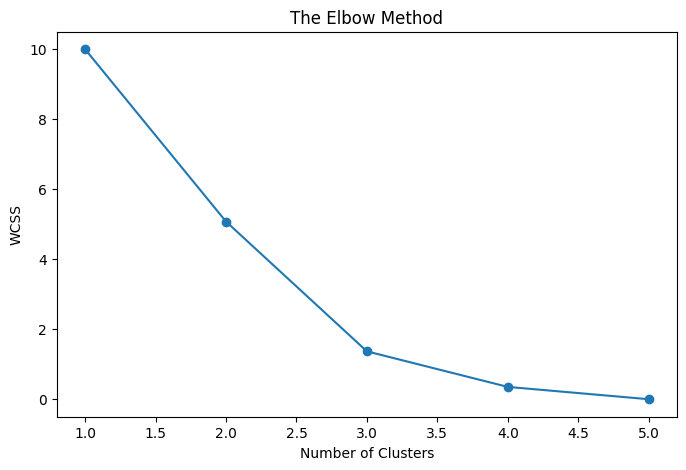

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,6),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [ ]:
Model = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
y_Kmeans = Model.fit_predict(data)
y_Kmeans
data['cluster'] = y_Kmeans

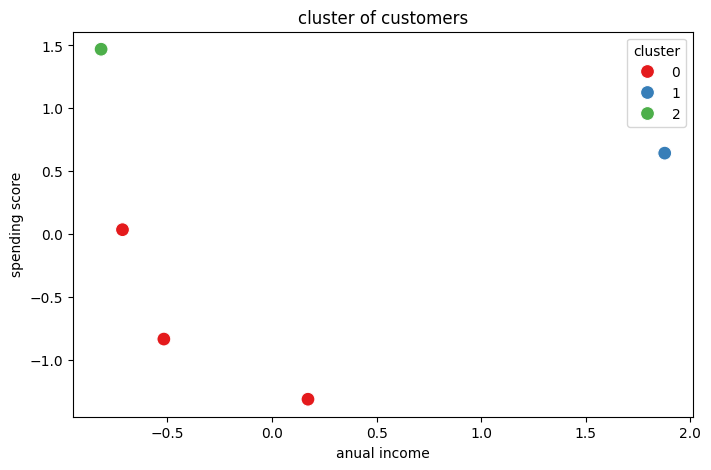

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data =data,x = 'anual_income',y = 'spending_score', hue = 'cluster', palette='Set1',s=100)
plt.title('cluster of customers')
plt.xlabel('anual income')
plt.ylabel('spending score')
plt.show()
